In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:


# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Derivative of the sigmoid function
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# OR neuron model with training
class Neuron:
    def __init__(self):
        # Set random seed for reproducibility
        np.random.seed(42)
        # Initialize weights and bias randomly
        self.weights = np.random.randn(2)
        self.bias = np.random.randn()
        self.errors = []
    
    def predict(self, x1, x2):
        z = self.weights[0] * x1 + self.weights[1] * x2 + self.bias
        # Apply sigmoid function
        y_prob = sigmoid(z)
        # Apply threshold to get binary output
        y_pred = 1 if y_prob > 0.5 else 0
        print(f"predict({x1}, {x2}) -> {y_pred}")  # Debug print
        return y_pred
    
    def train(self, inputs, labels, learning_rate=0.1, epochs=10000):
        for _ in range(epochs):
            total_error = 0
            for x, y_true in zip(inputs, labels):
                x1, x2 = x
                z = self.weights[0] * x1 + self.weights[1] * x2 + self.bias
                y_pred = sigmoid(z)
                # y_pred = 1 if sigmoid(z) > 0.5 else 0
            
                # Calculate gradients
                error = y_pred - y_true
                d_weights = error * sigmoid_derivative(z) * np.array([x1, x2])
                d_bias = error * sigmoid_derivative(z)
                total_error += error**2
                
                # Update weights and bias
                self.weights -= learning_rate * d_weights
                self.bias -= learning_rate * d_bias

            # strore the total error for each epoch
            self.errors.append(total_error)
                
    def plot_errors(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.errors, label='Total Squared Error', color='blue')
        plt.xlabel('Epochs')
        plt.ylabel('Total Squared Error')
        plt.title('Error Reduction Over Time During Training')
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_decision_boundary(self, inputs, labels):
        # Generate a grid of points
        x_min, x_max = -0.5, 1.5
        y_min, y_max = -0.5, 1.5
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        
        # Predict outputs for each point in the grid
        zz = np.array([self.predict(x1, x2) for x1, x2 in zip(xx.ravel(), yy.ravel())])
        zz = zz.reshape(xx.shape)
        
        # Create the plot
        fig, ax = plt.subplots(figsize=(8, 8))
        fig.patch.set_facecolor('black')  # Set figure background to black
        ax.set_facecolor('black')  # Set axes background to black
        
        # Plot the decision boundary
        contour = ax.contourf(xx, yy, zz, levels=[0, 0.5, 1], colors=['purple', 'lightgreen'], alpha=0.3)
        # contour = ax.contourf(xx, yy, zz, levels=[0, 0.5, 1], colors=['#B39DDB', '#FFCC80'], alpha=0.7)

        
        # Plot the original data points
        for (x1, x2), label in zip(inputs, labels):
            ax.scatter(x1, x2, color='purple' if label == 0 else 'lightgreen', edgecolor='white', s=200)
        
        # Set plot labels and limits
        ax.set_xlabel('$x_1$', fontsize=14, color='pink')
        ax.set_ylabel('$x_2$', fontsize=14, color='pink')
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        
        # Set equal aspect ratio
        ax.set_aspect('equal', adjustable='box')
        
        # Set axis and grid colors
        ax.spines['bottom'].set_color('white')
        ax.spines['top'].set_color('white')
        ax.spines['right'].set_color('white')
        ax.spines['left'].set_color('white')
        ax.tick_params(axis='x', colors='white')
        ax.tick_params(axis='y', colors='white')
        ax.grid(color='gray', linestyle='--', linewidth=0.5)
        
        # Set the title and show the plot
        ax.set_title('Decision Boundary for OR Neuron', color='white')
        plt.show()


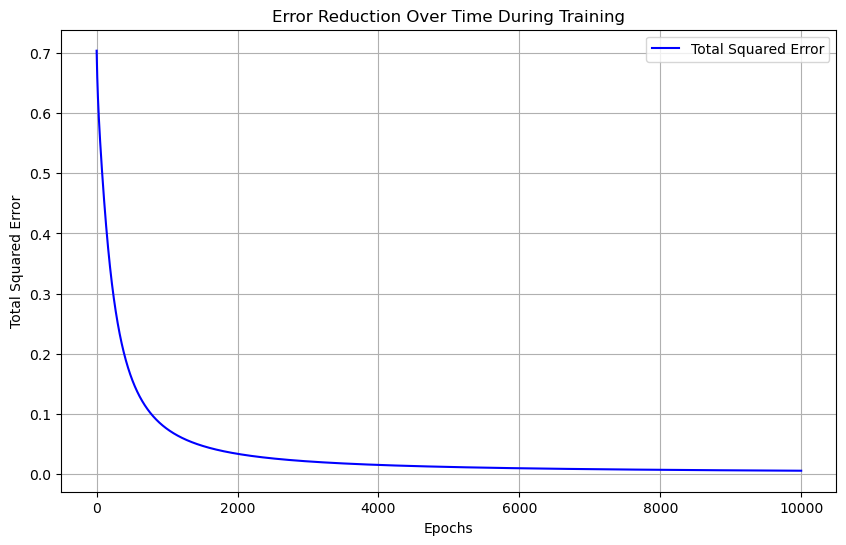

predict(-0.5, -0.5) -> 0
predict(-0.4797979797979798, -0.5) -> 0
predict(-0.4595959595959596, -0.5) -> 0
predict(-0.4393939393939394, -0.5) -> 0
predict(-0.41919191919191917, -0.5) -> 0
predict(-0.398989898989899, -0.5) -> 0
predict(-0.3787878787878788, -0.5) -> 0
predict(-0.35858585858585856, -0.5) -> 0
predict(-0.33838383838383834, -0.5) -> 0
predict(-0.3181818181818182, -0.5) -> 0
predict(-0.29797979797979796, -0.5) -> 0
predict(-0.2777777777777778, -0.5) -> 0
predict(-0.25757575757575757, -0.5) -> 0
predict(-0.23737373737373735, -0.5) -> 0
predict(-0.21717171717171713, -0.5) -> 0
predict(-0.19696969696969696, -0.5) -> 0
predict(-0.17676767676767674, -0.5) -> 0
predict(-0.15656565656565652, -0.5) -> 0
predict(-0.13636363636363635, -0.5) -> 0
predict(-0.11616161616161613, -0.5) -> 0
predict(-0.09595959595959591, -0.5) -> 0
predict(-0.07575757575757575, -0.5) -> 0
predict(-0.055555555555555525, -0.5) -> 0
predict(-0.035353535353535304, -0.5) -> 0
predict(-0.015151515151515138, -0.5) -

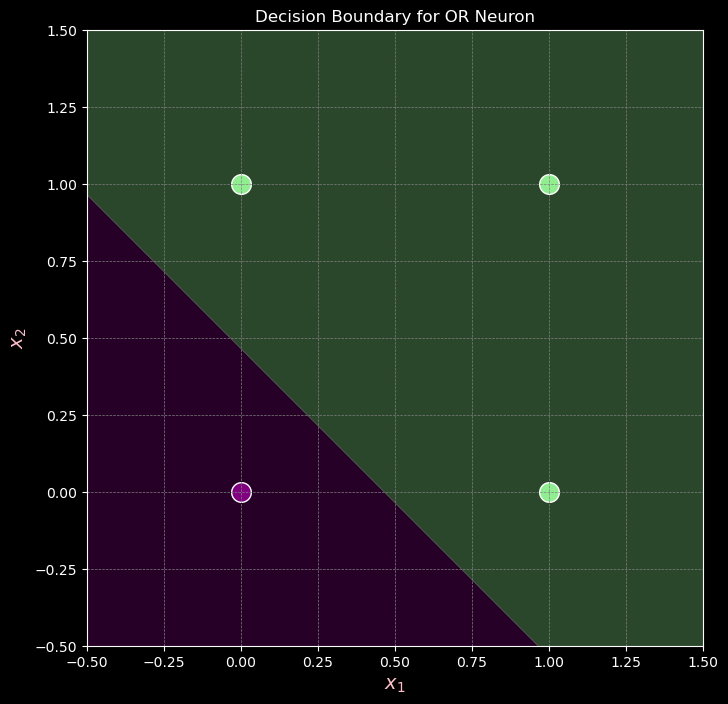

x1 x2 | y_pred
predict(0, 0) -> 0
0  0  | 0.0
predict(0, 1) -> 1
0  1  | 1.0
predict(1, 0) -> 1
1  0  | 1.0
predict(1, 1) -> 1
1  1  | 1.0


In [3]:
# Training data for OR gate
inputs = np.array([(0, 0), (0, 1), (1, 0), (1, 1)])
labels = np.array([0, 1, 1, 1])

# Initialize the neuron
ORneuron = Neuron()

# Train the neuron
ORneuron.train(inputs, labels)

ORneuron.plot_errors()

ORneuron.plot_decision_boundary(inputs, labels)

# Test the trained neuron
print("x1 x2 | y_pred")
for x1, x2 in inputs:
    y_pred = ORneuron.predict(x1, x2)
    
    print(f"{x1}  {x2}  | {y_pred:.1f}")

In [4]:
zz = np.array([self.predict(x1, x2) for x1, x2 in zip(xx.ravel(), yy.ravel())])
zz = zz.reshape(xx.shape)

NameError: name 'xx' is not defined

In [ ]:
def plot_decision_boundary(self, inputs, labels):
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Debugging reshape
    print(f"xx.shape: {xx.shape}, yy.shape: {yy.shape}")
    
    zz = np.array([self.predict(x1, x2) for x1, x2 in zip(xx.ravel(), yy.ravel())])
    
    # Debugging array conversion
    print(f"zz.dtype: {zz.dtype}, zz.shape: {zz.shape}")
    
    zz = zz.reshape(xx.shape)
    
    fig, ax = plt.subplots(figsize=(8, 8))
    fig.patch.set_facecolor('black')
    ax.set_facecolor('black')
    
    ax.contourf(xx, yy, zz, levels=[0, 0.5, 1], colors=['purple', 'lightgreen'], alpha=0.3)
    
    for (x1, x2), label in zip(inputs, labels):
        ax.scatter(x1, x2, color='purple' if label == 0 else 'lightgreen', edgecolor='white', s=200)
    
    ax.set_xlabel('$x_1$', fontsize=14, color='pink')
    ax.set_ylabel('$x_2$', fontsize=14, color='pink')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_aspect('equal', adjustable='box')
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.grid(color='gray', linestyle='--', linewidth=0.5)
    
    ax.set_title('Decision Boundary for OR Neuron', color='white')
    plt.show()

In [ ]:
# Points and their classifications
points = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 1, 1, 1])  # Corresponding OR gate outputs

# Colors for the points
colors = ['purple' if label == 0 else 'lightgreen' for label in labels]

# Create the plot with a black background
fig, ax = plt.subplots()
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Plotting the points
ax.scatter(points[:, 0], points[:, 1], color=colors, s=200, edgecolors='black')

# Draw the decision boundary
x_values = np.linspace(-0.1, 1.1, 100)
y_values = -x_values + 0.5  # This is the decision boundary line
ax.plot(x_values, y_values, 'orange', linestyle='--')

# Annotating the axes
ax.axhline(0, color='white', linewidth=0.5)
ax.axvline(0, color='white', linewidth=0.5)
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)

# Set equal aspect ratio for x and y axes
ax.set_aspect('equal')

# Labels and title
ax.set_xlabel('$x_1$', fontsize=14, color='pink')
ax.set_ylabel('$x_2$', fontsize=14, color='pink')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.tick_params(colors='white')

# Display the plot
ax.grid(True, which='both', color='gray', linestyle='--', linewidth=0.5)
plt.show()

ValueError: object __array__ method not producing an array

<Figure size 640x480 with 1 Axes>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate grid data for the surface
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
x1, x2 = np.meshgrid(x1, x2)
z = sigmoid(x1 + x2)

# OR gate data points
points = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 1, 1, 1])  # Corresponding OR gate outputs
z_points = sigmoid(points[:, 0] + points[:, 1])

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', facecolor='black')

# Plot the surface
ax.plot_surface(x1, x2, z, cmap='viridis', alpha=0.6, edgecolor='white')

# Plot the OR gate data points
colors = ['purple' if label == 0 else 'lightgreen' for label in labels]
ax.scatter(points[:, 0], points[:, 1], z_points, color=colors, s=100)

# Set the axis labels
ax.set_xlabel('$x_1$', color='white')
ax.set_ylabel('$x_2$', color='white')
ax.set_zlabel('Output', color='white')

# Set axis limits
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.set_zlim(0, 1)

# Set background color
ax.set_facecolor('black')
ax.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))

# Set grid color
ax.xaxis._axinfo["grid"].update({"color": "white"})
ax.yaxis._axinfo["grid"].update({"color": "white"})
ax.zaxis._axinfo["grid"].update({"color": "white"})

# Set tick colors
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='white')

# Show the plot
plt.show()

ValueError: object __array__ method not producing an array

<Figure size 640x480 with 1 Axes>

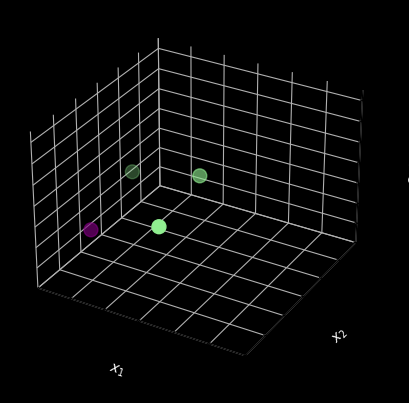

In [5]:

# Generate grid data for the surface
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
x1, x2 = np.meshgrid(x1, x2)
z = sigmoid(x1 + x2)

# OR gate data points
points = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 1, 1, 1])  # Corresponding OR gate outputs
z_points = sigmoid(points[:, 0] + points[:, 1])

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set the background to black
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Plot the surface with a wireframe and remove color map
# ax.plot_wireframe(x1, x2,  color='white', alpha=0.5)

# Plot the OR gate data points
colors = ['purple' if label == 0 else 'lightgreen' for label in labels]
ax.scatter(points[:, 0], points[:, 1], z_points, color=colors, s=100)

# Set the axis labels with white color
ax.set_xlabel('$x_1$', color='white')
ax.set_ylabel('$x_2$', color='white')
ax.set_zlabel('Output', color='white')

# Set axis limits to match the input space
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-0.5, 2.5)
ax.set_zlim(0, 1.5)

# Adjust the pane colors to match the black background
ax.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))

# # Adjust grid line colors
# ax.xaxis._axinfo["grid"].update({"color": "gray"})
# ax.yaxis._axinfo["grid"].update({"color": "gray"})
# ax.zaxis._axinfo["grid"].update({"color": "gray"})

# # Set tick colors to white
# ax.tick_params(axis='x', colors='white')
# ax.tick_params(axis='y', colors='white')
# ax.tick_params(axis='z', colors='white')

# Display the plot
plt.show()